## **TESLA Stock Analysis and Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import seaborn as sns

<ipython-input-1-bd62e134dfa4>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


**Analysis**

In [2]:
df = pd.read_csv('/content/tesla_dataset.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.drop(['Adj Close'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [5]:
print('Features : ',df.shape[1])
print('Examples : ',df.shape[0])

Features :  6
Examples :  2416


In [6]:
df.Date = pd.to_datetime(df.Date,errors='coerce')

In [7]:
df.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2411,False,False,False,False,False,False
2412,False,False,False,False,False,False
2413,False,False,False,False,False,False
2414,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Visualisation**

<Axes: >

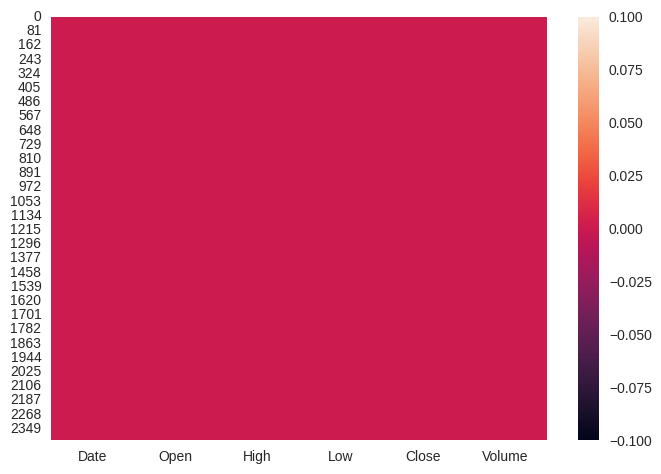

In [9]:
sns.heatmap(df.isnull())

<Axes: >

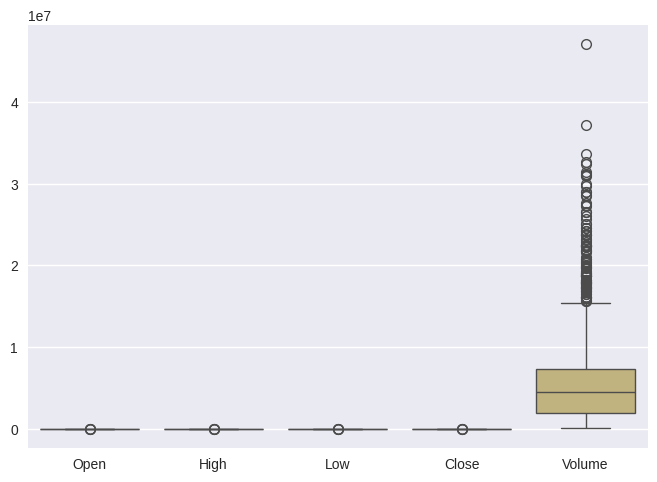

In [10]:
sns.boxplot(data = df)

<Axes: xlabel='Date', ylabel='High'>

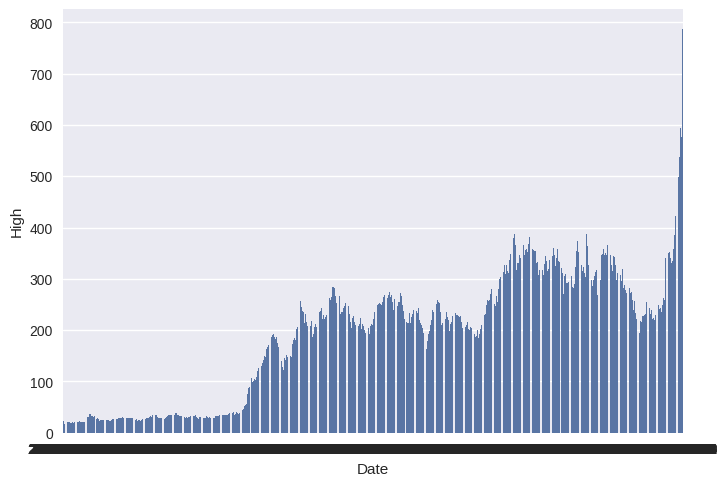

In [11]:
sns.barplot(x='Date',y='High',data = df)

 **Machine Learning(Prediction)**

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(['High'],axis=1)
y  = df.High
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [19]:
model = KNeighborsClassifier(n_neighbors=5)

In [20]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = model.predict(X_test)
print('Accuracy score :  ',accuracy_score(y_test,y_pred),'%')

Accuracy score :   0.0 %


In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred = model.predict(X_test)
print('Accuracy score :  ',accuracy_score(y_test,y_pred),'%')

Accuracy score :   0.0016556291390728477 %


In [24]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns :
    df[col] = le.fit_transform(df[col])

<ipython-input-25-9f65b075f40e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df,shade=True,ax=ax)


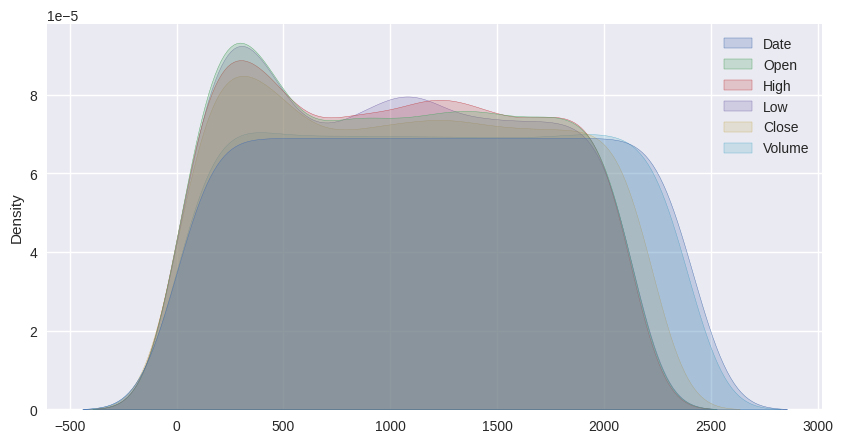

In [25]:
fig,ax  = plt.subplots(figsize = (10,5))
sns.kdeplot(data = df,shade=True,ax=ax)
plt.show()

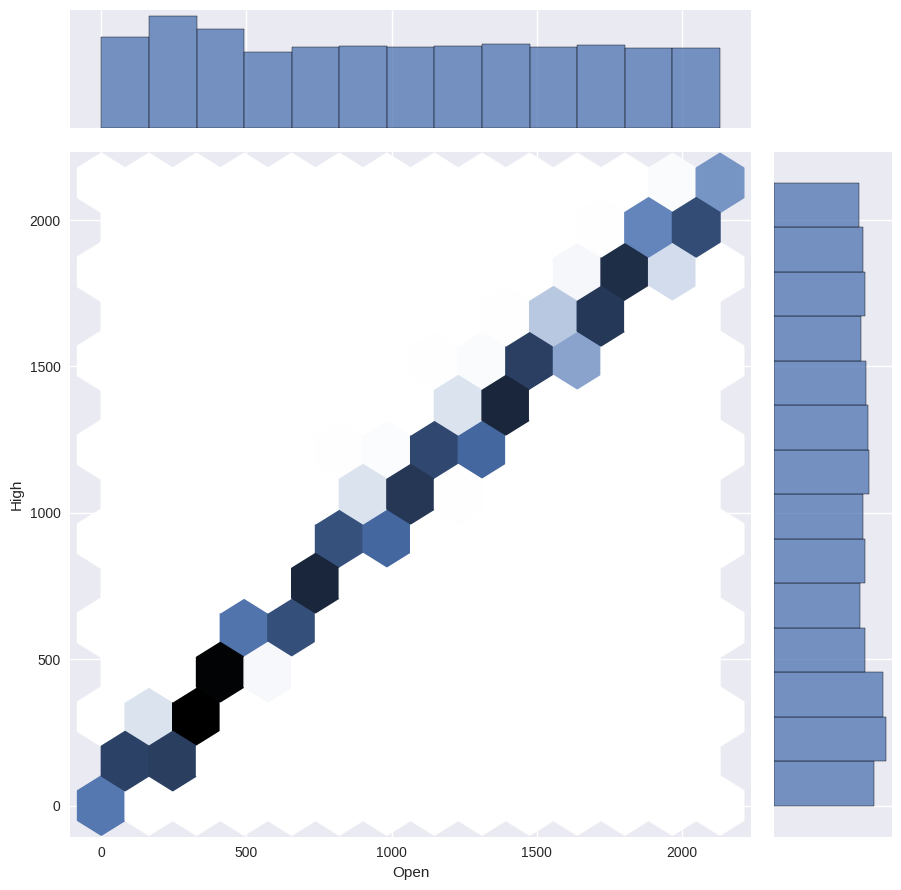

In [26]:
sns.jointplot(x='Open',y='High',kind='hex',height=9,data=df)

<Axes: xlabel='Open', ylabel='Close'>

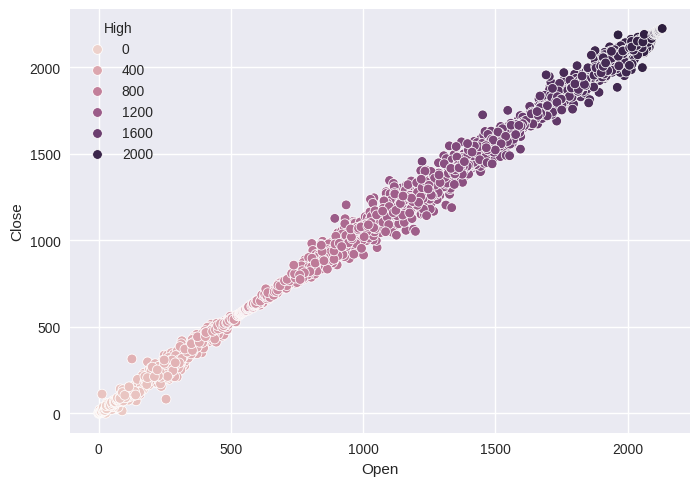

In [27]:
sns.scatterplot(x='Open',y='Close',hue='High',data=df)

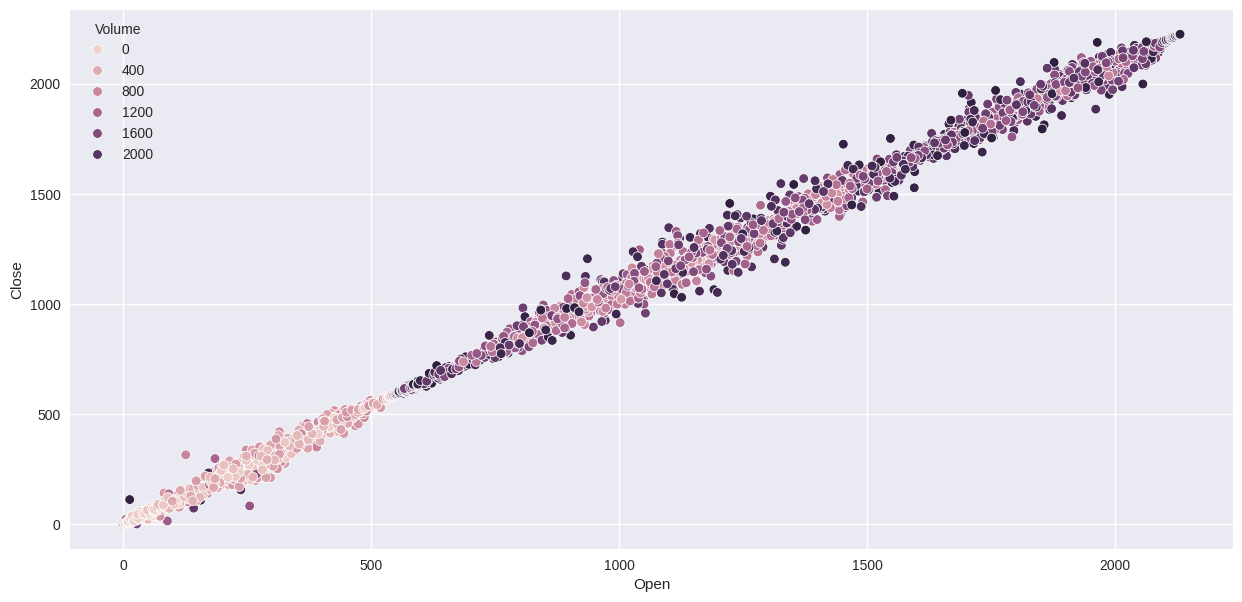

In [28]:
fig,ax = plt.subplots(figsize=(15,7))
sns.scatterplot(x='Open',y='Close',hue='Volume',data=df,ax=ax)
plt.show()